In [89]:
import pickle as pk
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.neural_network import MLPClassifier

In [2]:
# %pip install shap
# %pip install tensorflow
# %pip install --upgrade jupyter
# %pip install --upgrade ipywidgets

### 📌 **Redes Neurais: conjunto sem balanceamento**

In [3]:
with open('../sample_data/census.pkl', 'rb') as f:
    X_census_training_set, y_census_training_set, X_census_test_set, y_census_test_set, df_transformed, one_hot_encoder_census = pk.load(f)

In [4]:
X_census_training_set.shape, y_census_training_set.shape

((27656, 41), (27656,))

In [5]:
X_census_test_set.shape, y_census_test_set.shape

((4881, 41), (4881,))

In [6]:
(41 + 1) / 2

21.0

In [7]:
neural_network = MLPClassifier(verbose = True, max_iter = 1000, tol = 0.000010, hidden_layer_sizes = (14,14,14))
neural_network.fit(X_census_training_set, y_census_training_set)

Iteration 1, loss = 0.46267292
Iteration 2, loss = 0.37896353
Iteration 3, loss = 0.37198334
Iteration 4, loss = 0.36711820
Iteration 5, loss = 0.36313271
Iteration 6, loss = 0.36164405
Iteration 7, loss = 0.35849802
Iteration 8, loss = 0.35662375
Iteration 9, loss = 0.35628271
Iteration 10, loss = 0.35585394
Iteration 11, loss = 0.35496116
Iteration 12, loss = 0.35484523
Iteration 13, loss = 0.35358580
Iteration 14, loss = 0.35330369
Iteration 15, loss = 0.35339885
Iteration 16, loss = 0.35255128
Iteration 17, loss = 0.35282513
Iteration 18, loss = 0.35167001
Iteration 19, loss = 0.35267983
Iteration 20, loss = 0.35081695
Iteration 21, loss = 0.35108223
Iteration 22, loss = 0.35045206
Iteration 23, loss = 0.35037178
Iteration 24, loss = 0.34905047
Iteration 25, loss = 0.34907496
Iteration 26, loss = 0.34908507
Iteration 27, loss = 0.34893439
Iteration 28, loss = 0.34806832
Iteration 29, loss = 0.34801146
Iteration 30, loss = 0.34768962
Iteration 31, loss = 0.34763568
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(14, 14, 14), max_iter=1000, tol=1e-05,
              verbose=True)

In [8]:
predictor = neural_network.predict(X_census_test_set)
predictor

array([' >50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype='<U6')

In [9]:
y_census_test_set

array([' >50K', ' <=50K', ' >50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

##### ↬ **Estatísticas de Classificação e Matriz de Confusão**

In [10]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from yellowbrick.classifier import ConfusionMatrix

In [11]:
accuracy_score(y_census_test_set, predictor)

0.8395820528580209

In [12]:
print(classification_report(y_census_test_set, predictor))

              precision    recall  f1-score   support

       <=50K       0.88      0.92      0.90      3653
        >50K       0.71      0.61      0.66      1228

    accuracy                           0.84      4881
   macro avg       0.79      0.76      0.78      4881
weighted avg       0.83      0.84      0.84      4881



0.8395820528580209

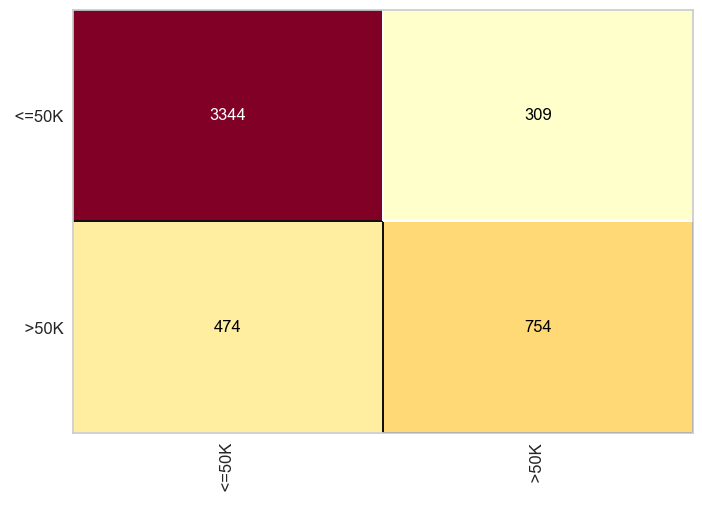

In [13]:
cm = ConfusionMatrix(neural_network)
cm.fit(X_census_training_set, y_census_training_set)
cm.score(X_census_test_set, y_census_test_set)

### 📌 **Árvore de Decisão: conjunto com balanceamento do tipo 'Random Over Sampling'**

In [14]:
with open('../sample_data/census_ros.pkl', 'rb') as f_ros:
    X_census_training_set_ros, y_census_training_set_ros, X_census_test_set_ros, y_census_test_set_ros, df_transformed, one_hot_encoder_census = pk.load(f_ros)

In [15]:
X_census_training_set_ros.shape, y_census_training_set_ros.shape

((42090, 41), (42090,))

In [16]:
X_census_test_set_ros.shape, y_census_test_set_ros.shape

((4881, 41), (4881,))

In [17]:
neural_network_ros = MLPClassifier(verbose = True, max_iter = 1000, tol = 0.000010, hidden_layer_sizes = (14,14,14))
neural_network_ros.fit(X_census_training_set_ros, y_census_training_set_ros)

Iteration 1, loss = 0.62623827
Iteration 2, loss = 0.45808525
Iteration 3, loss = 0.43406718
Iteration 4, loss = 0.43052261
Iteration 5, loss = 0.42757067
Iteration 6, loss = 0.42556720
Iteration 7, loss = 0.42584531
Iteration 8, loss = 0.42379789
Iteration 9, loss = 0.42345086
Iteration 10, loss = 0.42326292
Iteration 11, loss = 0.42358170
Iteration 12, loss = 0.42149040
Iteration 13, loss = 0.42014455
Iteration 14, loss = 0.42052143
Iteration 15, loss = 0.42013640
Iteration 16, loss = 0.41951336
Iteration 17, loss = 0.41891732
Iteration 18, loss = 0.41997888
Iteration 19, loss = 0.41880505
Iteration 20, loss = 0.41767217
Iteration 21, loss = 0.41839046
Iteration 22, loss = 0.41723353
Iteration 23, loss = 0.41741193
Iteration 24, loss = 0.41620309
Iteration 25, loss = 0.41680592
Iteration 26, loss = 0.41712171
Iteration 27, loss = 0.41692544
Iteration 28, loss = 0.41517948
Iteration 29, loss = 0.41590493
Iteration 30, loss = 0.41548924
Iteration 31, loss = 0.41635883
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(14, 14, 14), max_iter=1000, tol=1e-05,
              verbose=True)

In [18]:
predictor_ros = neural_network_ros.predict(X_census_test_set_ros)
predictor_ros

array([' >50K', ' <=50K', ' >50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype='<U6')

In [19]:
y_census_test_set_ros

array([' >50K', ' <=50K', ' >50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

##### ↬ **Estatísticas de Classificação e Matriz de Confusão**

In [20]:
accuracy_score(y_census_test_set_ros, predictor_ros)

0.7949190739602541

In [21]:
print(classification_report(y_census_test_set_ros, predictor_ros))

              precision    recall  f1-score   support

       <=50K       0.93      0.78      0.85      3653
        >50K       0.56      0.84      0.67      1228

    accuracy                           0.79      4881
   macro avg       0.75      0.81      0.76      4881
weighted avg       0.84      0.79      0.81      4881



0.7949190739602541

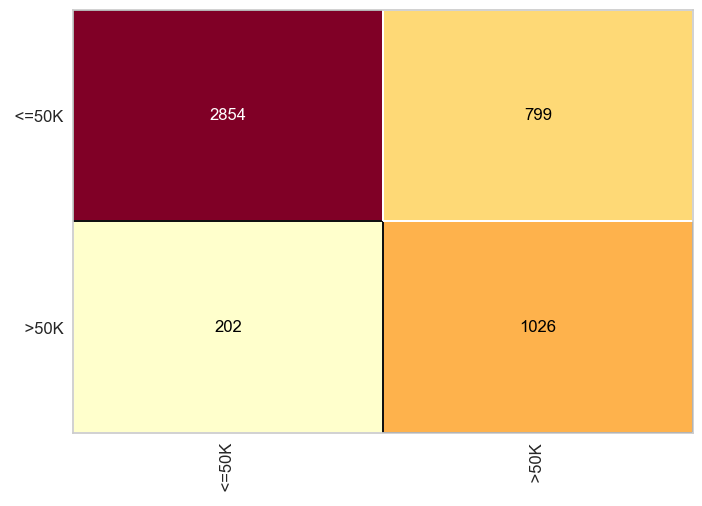

In [22]:
cm = ConfusionMatrix(neural_network_ros)
cm.fit(X_census_training_set_ros, y_census_training_set_ros)
cm.score(X_census_test_set_ros, y_census_test_set_ros)

### 📌 **Árvore de Decisão: conjunto com balanceamento do tipo 'SMOTE'**

In [23]:
with open('../sample_data/census_smote.pkl', 'rb') as f_smote:
    X_census_training_set_smote, y_census_training_set_smote, X_census_test_set_smote, y_census_test_set_smote, df_transformed, one_hot_encoder_census = pk.load(f_smote)

In [24]:
X_census_training_set_smote.shape, y_census_training_set_smote.shape

((42090, 41), (42090,))

In [25]:
X_census_test_set_smote.shape, y_census_test_set_smote.shape

((4881, 41), (4881,))

In [26]:
neural_network_smote = MLPClassifier(verbose = True, max_iter = 1000, tol = 0.000010, hidden_layer_sizes = (14,14,14))
neural_network_smote.fit(X_census_training_set_smote, y_census_training_set_smote)

Iteration 1, loss = 0.65589365
Iteration 2, loss = 0.45315659
Iteration 3, loss = 0.41698029
Iteration 4, loss = 0.41166550
Iteration 5, loss = 0.40896426
Iteration 6, loss = 0.40754909
Iteration 7, loss = 0.40680182
Iteration 8, loss = 0.40575467
Iteration 9, loss = 0.40473387
Iteration 10, loss = 0.40349420
Iteration 11, loss = 0.40288560
Iteration 12, loss = 0.40338208
Iteration 13, loss = 0.40098289
Iteration 14, loss = 0.40336764
Iteration 15, loss = 0.40047185
Iteration 16, loss = 0.39978401
Iteration 17, loss = 0.39918264
Iteration 18, loss = 0.39876549
Iteration 19, loss = 0.39840348
Iteration 20, loss = 0.39710040
Iteration 21, loss = 0.39583438
Iteration 22, loss = 0.39513060
Iteration 23, loss = 0.39426368
Iteration 24, loss = 0.39335943
Iteration 25, loss = 0.39317828
Iteration 26, loss = 0.39252711
Iteration 27, loss = 0.39379575
Iteration 28, loss = 0.39249510
Iteration 29, loss = 0.39108328
Iteration 30, loss = 0.39097357
Iteration 31, loss = 0.39242963
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(14, 14, 14), max_iter=1000, tol=1e-05,
              verbose=True)

In [27]:
predictor_smote = neural_network_smote.predict(X_census_test_set_smote)
predictor_smote

array([' >50K', ' <=50K', ' >50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype='<U6')

In [28]:
y_census_test_set_smote

array([' >50K', ' <=50K', ' >50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

##### ↬ **Estatísticas de Classificação e Matriz de Confusão**

In [29]:
accuracy_score(y_census_test_set_smote, predictor_smote)

0.8070067609096496

In [30]:
print(classification_report(y_census_test_set_smote, predictor_smote))

              precision    recall  f1-score   support

       <=50K       0.93      0.81      0.86      3653
        >50K       0.58      0.81      0.68      1228

    accuracy                           0.81      4881
   macro avg       0.76      0.81      0.77      4881
weighted avg       0.84      0.81      0.82      4881



0.8070067609096496

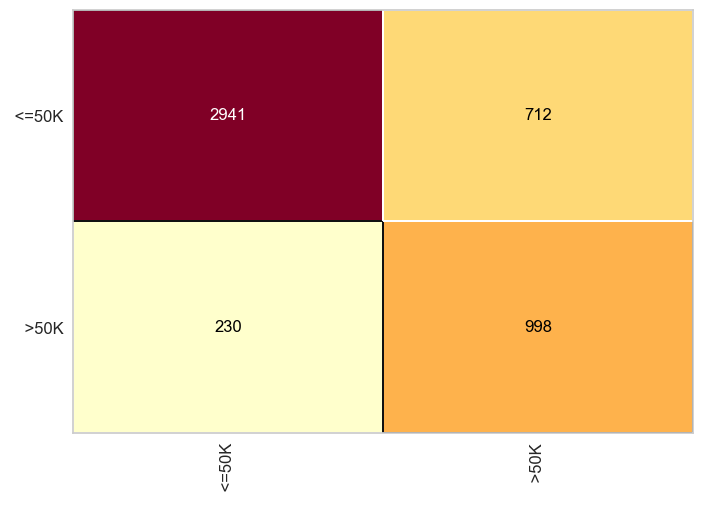

In [31]:
cm = ConfusionMatrix(neural_network_smote)
cm.fit(X_census_training_set_smote, y_census_training_set_smote)
cm.score(X_census_test_set_smote, y_census_test_set_smote)

In [32]:
weights_first_hidden_layer = neural_network.coefs_[0]

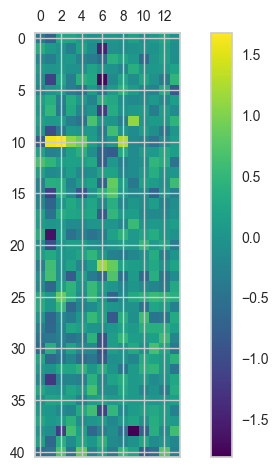

In [33]:
fig, ax = plt.subplots()
cax = ax.matshow(weights_first_hidden_layer, cmap='viridis')
fig.colorbar(cax)
plt.show()

### 📌 **Árvore de Decisão: conjunto com balanceamento do tipo 'Random Under Sampling'**

In [34]:
with open('../sample_data/census_rus.pkl', 'rb') as f_rus:
    X_census_training_set_rus, y_census_training_set_rus, X_census_test_set_rus, y_census_test_set_rus, df_transformed, one_hot_encoder_census = pk.load(f_rus)

In [35]:
X_census_training_set_rus.shape, y_census_training_set_rus.shape

((13222, 41), (13222,))

In [36]:
X_census_test_set_rus.shape, y_census_test_set_rus.shape

((4881, 41), (4881,))

In [37]:
neural_network_rus = MLPClassifier(verbose = True, max_iter = 1000, tol = 0.000010, hidden_layer_sizes = (14,14,14))
neural_network_rus.fit(X_census_training_set_rus, y_census_training_set_rus)

Iteration 1, loss = 0.65215652
Iteration 2, loss = 0.57557252
Iteration 3, loss = 0.49404776
Iteration 4, loss = 0.45545576
Iteration 5, loss = 0.44360123
Iteration 6, loss = 0.43791823


Iteration 7, loss = 0.43519052
Iteration 8, loss = 0.43484652
Iteration 9, loss = 0.43337519
Iteration 10, loss = 0.43346325
Iteration 11, loss = 0.42939346
Iteration 12, loss = 0.43031155
Iteration 13, loss = 0.43135991
Iteration 14, loss = 0.42819509
Iteration 15, loss = 0.42728785
Iteration 16, loss = 0.42826266
Iteration 17, loss = 0.42883171
Iteration 18, loss = 0.42815671
Iteration 19, loss = 0.42798389
Iteration 20, loss = 0.42622432
Iteration 21, loss = 0.42761772
Iteration 22, loss = 0.42593808
Iteration 23, loss = 0.42731909
Iteration 24, loss = 0.42729204
Iteration 25, loss = 0.42542846
Iteration 26, loss = 0.42446776
Iteration 27, loss = 0.42493221
Iteration 28, loss = 0.42440315
Iteration 29, loss = 0.42607763
Iteration 30, loss = 0.42625242
Iteration 31, loss = 0.42304193
Iteration 32, loss = 0.42304483
Iteration 33, loss = 0.42267948
Iteration 34, loss = 0.42213674
Iteration 35, loss = 0.42242407
Iteration 36, loss = 0.42272836
Iteration 37, loss = 0.42338641
Iteration 3

MLPClassifier(hidden_layer_sizes=(14, 14, 14), max_iter=1000, tol=1e-05,
              verbose=True)

In [38]:
predictor_rus = neural_network_rus.predict(X_census_test_set_rus)
predictor_rus

array([' >50K', ' <=50K', ' >50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype='<U6')

In [39]:
y_census_test_set_rus

array([' >50K', ' <=50K', ' >50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

##### ↬ **Estatísticas de Classificação e Matriz de Confusão**

In [40]:
accuracy_score(y_census_test_set_rus, predictor_rus)

0.7568121286621594

In [41]:
print(classification_report(y_census_test_set_rus, predictor_rus))

              precision    recall  f1-score   support

       <=50K       0.95      0.71      0.81      3653
        >50K       0.51      0.88      0.65      1228

    accuracy                           0.76      4881
   macro avg       0.73      0.80      0.73      4881
weighted avg       0.84      0.76      0.77      4881



0.7568121286621594

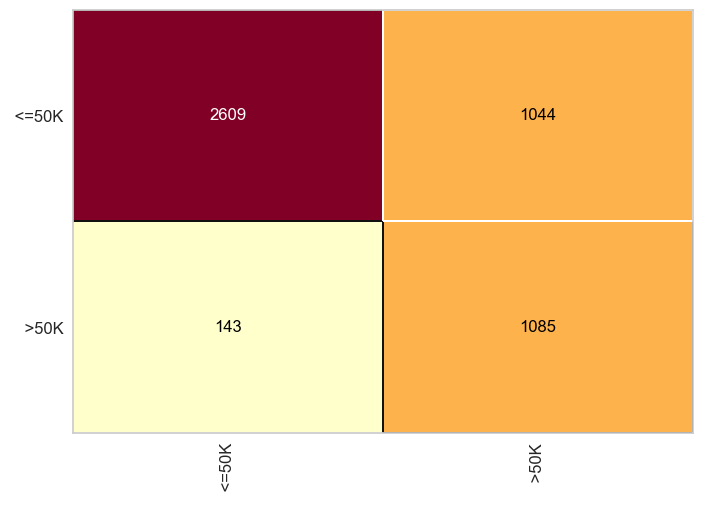

In [42]:
cm = ConfusionMatrix(neural_network_rus)
cm.fit(X_census_training_set_rus, y_census_training_set_rus)
cm.score(X_census_test_set_rus, y_census_test_set_rus)

### 📌 **Árvore de Decisão: conjunto com balanceamento do tipo 'NearMiss'**

In [43]:
with open('../sample_data/census_nearmiss.pkl', 'rb') as f_nearmiss:
    X_census_training_set_nearmiss, y_census_training_set_nearmiss, X_census_test_set_nearmiss, y_census_test_set_nearmiss, df_transformed, one_hot_encoder_census = pk.load(f_nearmiss)

In [44]:
X_census_training_set_nearmiss.shape, y_census_training_set_nearmiss.shape

((13222, 41), (13222,))

In [45]:
X_census_test_set_nearmiss.shape, y_census_test_set_nearmiss.shape

((4881, 41), (4881,))

In [46]:
neural_network_nearmiss = MLPClassifier(verbose = True, max_iter = 1000, tol = 0.000010, hidden_layer_sizes = (14,14,14))
neural_network_nearmiss.fit(X_census_training_set_nearmiss, y_census_training_set_nearmiss)

Iteration 1, loss = 0.79885905
Iteration 2, loss = 0.64808220


Iteration 3, loss = 0.62283238
Iteration 4, loss = 0.60594860
Iteration 5, loss = 0.59508955
Iteration 6, loss = 0.58682586
Iteration 7, loss = 0.58363779
Iteration 8, loss = 0.58144886
Iteration 9, loss = 0.58073354
Iteration 10, loss = 0.57528221
Iteration 11, loss = 0.57399086
Iteration 12, loss = 0.57229977
Iteration 13, loss = 0.57328721
Iteration 14, loss = 0.56978113
Iteration 15, loss = 0.57019988
Iteration 16, loss = 0.57313727
Iteration 17, loss = 0.56686989
Iteration 18, loss = 0.57053995
Iteration 19, loss = 0.56897851
Iteration 20, loss = 0.56544489
Iteration 21, loss = 0.56766324
Iteration 22, loss = 0.56499823
Iteration 23, loss = 0.56353401
Iteration 24, loss = 0.56363401
Iteration 25, loss = 0.56654871
Iteration 26, loss = 0.56376587
Iteration 27, loss = 0.56340858
Iteration 28, loss = 0.56076429
Iteration 29, loss = 0.56161553
Iteration 30, loss = 0.56393595
Iteration 31, loss = 0.56278273
Iteration 32, loss = 0.56021740
Iteration 33, loss = 0.56012048
Iteration 34, l

MLPClassifier(hidden_layer_sizes=(14, 14, 14), max_iter=1000, tol=1e-05,
              verbose=True)

In [47]:
predictor_nearmiss = neural_network_nearmiss.predict(X_census_test_set_nearmiss)
predictor_nearmiss

array([' >50K', ' <=50K', ' <=50K', ..., ' <=50K', ' >50K', ' >50K'],
      dtype='<U6')

In [48]:
y_census_test_set

array([' >50K', ' <=50K', ' >50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

##### ↬ **Estatísticas de Classificação e Matriz de Confusão**

In [49]:
accuracy_score(y_census_test_set_nearmiss, predictor_nearmiss)

0.7082565048145871

In [50]:
print(classification_report(y_census_test_set_nearmiss, predictor_nearmiss))

              precision    recall  f1-score   support

       <=50K       0.88      0.71      0.78      3653
        >50K       0.45      0.72      0.55      1228

    accuracy                           0.71      4881
   macro avg       0.67      0.71      0.67      4881
weighted avg       0.77      0.71      0.73      4881



0.7082565048145871

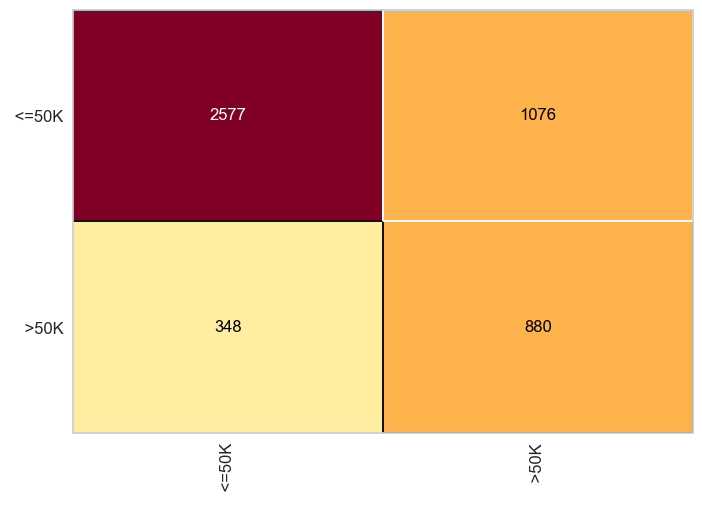

In [51]:
cm = ConfusionMatrix(neural_network_nearmiss)
cm.fit(X_census_training_set_nearmiss, y_census_training_set_nearmiss)
cm.score(X_census_test_set_nearmiss, y_census_test_set_nearmiss)

### ↬ **Entrega Final (Tuning + CV)** 

In [57]:
from sklearn.model_selection import GridSearchCV

In [53]:
X_credit_smote = np.concatenate((X_census_training_set_smote, X_census_test_set_smote), axis = 0)
y_credit_smote = np.concatenate((y_census_training_set_smote, y_census_test_set_smote), axis = 0)
X_credit_smote.shape, y_credit_smote.shape

((46971, 41), (46971,))

In [54]:
y_credit_smote

array([' >50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [56]:
parameters = {'activation': ['relu', 'logistic', 'tahn'],
              'solver': ['adam', 'sgd'],
              'batch_size': [128, 256],
              }

In [58]:
grid_search = GridSearchCV(estimator=MLPClassifier(), param_grid=parameters)
grid_search.fit(X_credit_smote, y_credit_smote)
best_params = grid_search.best_params_
win = grid_search.best_score_

C:\Users\miran\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\miran\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\miran\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\miran\A

In [59]:
best_params, win

({'activation': 'relu', 'batch_size': 128, 'solver': 'adam'},
 0.8437983775269915)

In [77]:
neural_network_smote_gs = MLPClassifier(activation='relu', batch_size=128, solver='adam')
neural_network_smote_gs.fit(X_census_training_set_smote, y_census_training_set_smote)

C:\Users\miran\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(batch_size=128)

In [78]:
predictor_smote_gs = neural_network_smote_gs.predict(X_census_test_set_smote)
predictor_smote_gs

array([' >50K', ' <=50K', ' >50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype='<U6')

In [79]:
accuracy_score(y_census_test_set_smote, predictor_smote_gs)

0.8154066789592297

In [80]:
print(classification_report(y_census_test_set_smote, predictor_smote))

              precision    recall  f1-score   support

       <=50K       0.93      0.81      0.86      3653
        >50K       0.58      0.81      0.68      1228

    accuracy                           0.81      4881
   macro avg       0.76      0.81      0.77      4881
weighted avg       0.84      0.81      0.82      4881



0.8154066789592297

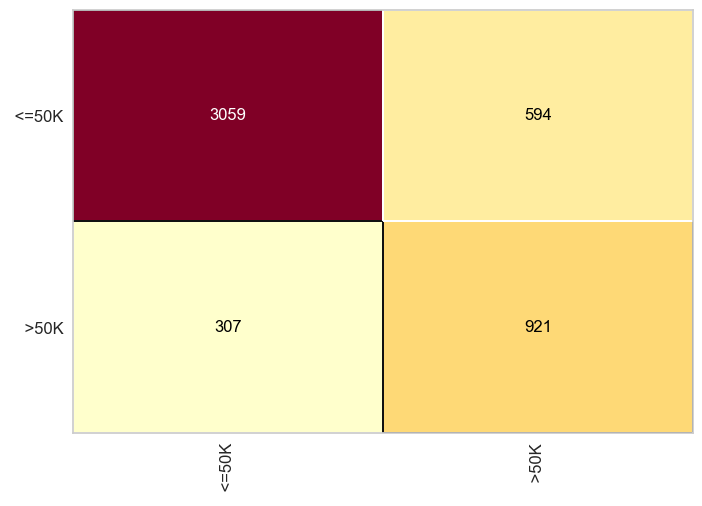

In [81]:
cm = ConfusionMatrix(neural_network_smote_gs)
cm.fit(X_census_training_set_smote, y_census_training_set_smote)
cm.score(X_census_test_set_smote, y_census_test_set_smote)

In [82]:
from sklearn.model_selection import cross_val_score, KFold

In [83]:
results_neural_network = []

for i in range(30):
    kfold = KFold(n_splits=10, shuffle=True, random_state=i)

    nn_cv =  MLPClassifier(activation='relu', batch_size=128, solver='adam')
    scores = cross_val_score(nn_cv, X_credit_smote, y_credit_smote, cv=kfold)

    results_neural_network.append(scores.mean())

C:\Users\miran\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\miran\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\miran\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\miran\A

In [84]:
results_neural_network

[0.8468205659745136,
 0.8447767942962969,
 0.8450957165579362,
 0.8446275862612775,
 0.8450958570423428,
 0.8483106795430142,
 0.8481616845004825,
 0.8465647348066794,
 0.8481616074606464,
 0.8463945492775341,
 0.847799751351664,
 0.8434141091480454,
 0.8462241734146765,
 0.843562904793355,
 0.8467140380085547,
 0.8443080794032367,
 0.8457773061127123,
 0.8466075689554116,
 0.8453300717385888,
 0.844478441670829,
 0.8457134038347529,
 0.8458623490279793,
 0.8437332081481317,
 0.8475015890599084,
 0.8463306787218603,
 0.8483319923870141,
 0.8451808682353248,
 0.8466926345294539,
 0.8466075145743508,
 0.8462453865600652]

In [86]:
X_credit_smote.shape, y_credit_smote.shape

((46971, 41), (46971,))

In [92]:
X_census_sm = np.concatenate((X_census_test_set_smote, X_census_training_set_smote), axis= 0)
y_census_sm = np.concatenate((y_census_test_set_smote, y_census_training_set_smote), axis=0)

In [93]:
classifier_neural_network = MLPClassifier(activation='relu', batch_size=128, solver='adam')
classifier_neural_network.fit(X_census_sm, y_census_sm)

C:\Users\miran\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(batch_size=128)

In [94]:
pk.dump(classifier_neural_network, open('neural_network_finished.sav', 'wb'))